<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_fev_2020/blob/master/02_Mahotas_fracionado_fev_14_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mahotas

In [0]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']
Prop=Escolha[1] # Propriedade a escolher para ter picos, largura de pico, proeminencia,...

In [0]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
import re
import Go2BlackWhite
import Go2Mahotas
%matplotlib inline

In [0]:
Size=20 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='Fotos9Amostras.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
NumFotos=len(img_name)


['Q6-1-4-B1.jpg', 'Q6-1-4-B2.jpg', 'Q6-1-4-B3.jpg', 'Q6-1-4-B4.jpg', 'Q6-1-4-B5.jpg', 'Q6-1-4-B6.jpg', 'Q6-1-4-B7.jpg', 'Q6-1-4-B8.jpg', 'Q6-1-4-B9.jpg', 'Q6-1-4-B10.jpg', 'Q6-1-4-G1.jpg', 'Q6-1-4-G2.jpg', 'Q6-1-4-G3.jpg', 'Q6-1-4-G4.jpg', 'Q6-1-4-G5.jpg', 'Q6-1-4-G6.jpg', 'Q6-1-4-G7.jpg', 'Q6-1-4-G8.jpg', 'Q6-1-4-G9.jpg', 'Q6-1-4-G10.jpg', 'Q6-1-4-I1.jpg', 'Q6-1-4-I2.jpg', 'Q6-1-4-I3.jpg', 'Q6-1-4-I4.jpg', 'Q6-1-4-I5.jpg', 'Q6-1-4-I6.jpg', 'Q6-1-4-I7.jpg', 'Q6-1-4-I8.jpg', 'Q6-1-4-I9.jpg', 'Q6-1-4-I10.jpg', 'Q6-1-5-B1.jpg', 'Q6-1-5-B2.jpg', 'Q6-1-5-B3.jpg', 'Q6-1-5-B4.jpg', 'Q6-1-5-B5.jpg', 'Q6-1-5-B6.jpg', 'Q6-1-5-B7.jpg', 'Q6-1-5-B8.jpg', 'Q6-1-5-B9.jpg', 'Q6-1-5-B10.jpg', 'Q6-1-5-G1.jpg', 'Q6-1-5-G2.jpg', 'Q6-1-5-G3.jpg', 'Q6-1-5-G4.jpg', 'Q6-1-5-G5.jpg', 'Q6-1-5-G6.jpg', 'Q6-1-5-G7.jpg', 'Q6-1-5-G8.jpg', 'Q6-1-5-G9.jpg', 'Q6-1-5-G10.jpg', 'Q6-1-5-I1.jpg', 'Q6-1-5-I2.jpg', 'Q6-1-5-I3.jpg', 'Q6-1-5-I4.jpg', 'Q6-1-5-I5.jpg', 'Q6-1-5-I6.jpg', 'Q6-1-5-I7.jpg', 'Q6-1-5-I8.jpg', 'Q6-1-5-

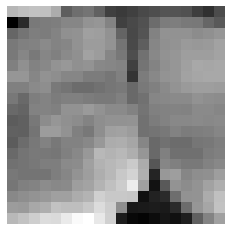

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[539], cmap = "gray")

In [0]:
Num,Row,Col=np.asarray(ww).shape
Idx=[]
New_Colunm=[]

for i in range(Num):
  Media=np.mean(ww[i])
  k=np.where(ww[i].ravel() > Media)
  Idx.append(np.asarray(k).ravel())

Quant=Size*Size
for i in Idx:
  #print(i)
  New_Colunm.append(len(i)/Quant)
print(New_Colunm)

[0.48, 0.4725, 0.39, 0.435, 0.3625, 0.3675, 0.4825, 0.475, 0.515, 0.4975, 0.5, 0.6275, 0.49, 0.5425, 0.4325, 0.4625, 0.4475, 0.6575, 0.5325, 0.4125, 0.5325, 0.39, 0.5175, 0.48, 0.5625, 0.4675, 0.44, 0.54, 0.465, 0.4975, 0.5575, 0.54, 0.46, 0.48, 0.4475, 0.455, 0.3275, 0.4325, 0.4025, 0.4575, 0.5, 0.46, 0.63, 0.4325, 0.505, 0.4425, 0.4425, 0.485, 0.5, 0.5125, 0.5575, 0.4875, 0.43, 0.5625, 0.4475, 0.4625, 0.395, 0.515, 0.4925, 0.4725, 0.4125, 0.41, 0.4225, 0.4825, 0.53, 0.49, 0.38, 0.405, 0.4125, 0.41, 0.53, 0.5775, 0.4675, 0.4675, 0.5, 0.51, 0.53, 0.485, 0.4775, 0.5275, 0.495, 0.5525, 0.48, 0.5275, 0.4325, 0.4575, 0.5475, 0.56, 0.535, 0.5, 0.51, 0.525, 0.44, 0.435, 0.5125, 0.39, 0.565, 0.5075, 0.485, 0.4825, 0.3775, 0.5275, 0.5475, 0.5325, 0.58, 0.4275, 0.41, 0.5175, 0.5225, 0.44, 0.4375, 0.395, 0.535, 0.555, 0.4825, 0.4325, 0.4625, 0.4525, 0.495, 0.4925, 0.3625, 0.375, 0.355, 0.4075, 0.405, 0.465, 0.4575, 0.4725, 0.4825, 0.4375, 0.585, 0.5325, 0.57, 0.4775, 0.4425, 0.4025, 0.45, 0.4625

In [0]:
print(len(New_Colunm))

540


In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [0]:
#foto 0 (k=0)
Size=800 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)
for k in range(NumFotos):
  p_foto=ww[k,:].reshape(Size,Size)
  GLCM=[]
  glcm_haralick=[]
  x_ref=[]
  Count=Sub_Size
  p=np.zeros((Sub_Size,Sub_Size))
  j_ref=0
  Cada_foto=[]
  Posicao_X=[]
  Posicao_Y=[]
  for k in range(Size):
    if((k+Sub_Size-1)<Size):
      #print("(k+Sub_Size)=",(k+Sub_Size),"k=",k)
      for i in range(Sub_Size):
        Posicao_X.append(Crop+i)
        for j in range(Sub_Size):
          p[i,j]=p_foto[Crop+i,j+k]
          Posicao_Y.append(j+k)

      WW=np.copy(p) 
      Cada_foto.append(WW.ravel())
      x_ref.append(Count-Sub_Size)
      Count=Count+1
      
      Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Nomes)
      
      GLCM=[]
      for ii in Nomes:
        GLCM.append(Mahotas[ii].mean())
        #print('cheguei aqui!!!')
      glcm_haralick.append(GLCM)

  df=pd.DataFrame(glcm_haralick,columns=Nomes)
  print(df)
  #print(Cada_foto)

In [0]:
# esta parte calcula picos, area abaixo da curva antes ela precisa gerar 
# o dataframe que contem a propriedade escolhida com uma foto em cada linha ....
for i in range(NumFotos):
  x=df[i,:]
  peaks, rr = find_peaks(x, height=0)

  N_peaks=len(peaks)
  prominences = peak_prominences(x, peaks)
  Media_proem=np.mean(prominences)
  Area = simps(x, dx=1)
  Width_peaks =np.mean(peak_widths(x, peaks, rel_height=0.5))
  Width_peaks_max =np.max(peak_widths(x, peaks, rel_height=0.5))
  Width_peaks_min =np.min(peak_widths(x, peaks, rel_height=0.5))
  Median = np.median(x)
  Mode= stats.mode(x)[0]
  Mean=np.mean(x)
  Sd=np.std(x)

  Features=[]
  Features.append(N_peaks)
  Features.append(Media_proem )
  Features.append(Area)
  Features.append(Width_peaks )
  Features.append(Width_peaks_max)
  Features.append(Width_peaks_min)
  Features.append(Median )
  Features.append(Mode[0])
  Features.append(Mean)
  Features.append(Sd)
  Features=pd.DataFrame(Features,index=Nomes)
  matriz_x_b[i,:]=np.array(Features.loc[:,0])

In [0]:
# find df texture for a given picture
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name)
print(df)

         ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0   0.062114   15.805556  0.118833  ...     2.600961 -0.510280  0.968961
1   0.054688   59.854167 -0.082244  ...     2.712072 -0.621625  0.989078
2   0.052951   90.243056 -0.000144  ...     2.840748 -0.725483  0.995986
3   0.052083   90.388889  0.160040  ...     2.771303 -0.680857  0.993830
4   0.053434   77.562500  0.331489  ...     2.764495 -0.644239  0.991322
5   0.060185   46.638889  0.507428  ...     2.696888 -0.673112  0.992278
6   0.064333   41.708333  0.522625  ...     2.634252 -0.634782  0.988039
7   0.058931   30.319444  0.483757  ...     2.319265 -0.723731  0.995494
8   0.057388   19.104167  0.481467  ...     2.259791 -0.750027  0.996652
9   0.053434   32.263889  0.207233  ...     2.535192 -0.732016  0.996303
10  0.051890   43.611111  0.369478  ...     2.595990 -0.779193  0.997869
11  0.056713   38.555556  0.426907  ...     2.498496 -0.744323  0.996186
12  0.058256   26.868056  0.170268  ...     2.41516

In [0]:
row_b,col=df_b.shape # pega quantas fotos tem

In [0]:
print(len(New_Colunm))

540


In [0]:
j=0
cont=-1
Posicao_Buraco=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
j=0
cont=-1
Posicao_Grao=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)

j=0
cont=-1
Posicao_Indef=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)

# print(Posicao_Grao)
# print(Posicao_Buraco)
# print(Posicao_Indef)


In [0]:
print(np.asarray(New_Colunm)[Posicao_Buraco])

[0.48   0.4725 0.39   0.435  0.3625 0.3675 0.4825 0.475  0.515  0.4975
 0.5575 0.54   0.46   0.48   0.4475 0.455  0.3275 0.4325 0.4025 0.4575
 0.4125 0.41   0.4225 0.4825 0.53   0.49   0.38   0.405  0.4125 0.41
 0.51   0.525  0.44   0.435  0.5125 0.39   0.565  0.5075 0.485  0.4825
 0.3625 0.375  0.355  0.4075 0.405  0.465  0.4575 0.4725 0.4825 0.4375
 0.33   0.5625 0.33   0.3675 0.41   0.5    0.53   0.4875 0.47   0.54
 0.5175 0.48   0.48   0.5525 0.3875 0.4575 0.3975 0.3575 0.4975 0.4
 0.465  0.515  0.5475 0.54   0.4675 0.3825 0.4725 0.505  0.51   0.5475
 0.4475 0.505  0.51   0.5025 0.4725 0.465  0.6425 0.4275 0.3775 0.4475
 0.41   0.49   0.56   0.4225 0.425  0.405  0.3525 0.4675 0.525  0.5375
 0.4125 0.4775 0.45   0.435  0.5    0.4275 0.43   0.3825 0.295  0.5075
 0.565  0.4575 0.425  0.3975 0.5125 0.5    0.4    0.3475 0.385  0.45
 0.3125 0.33   0.485  0.39   0.365  0.43   0.46   0.5275 0.5675 0.47
 0.4825 0.6025 0.53   0.6025 0.44   0.4575 0.3675 0.4875 0.395  0.4825
 0.3675 0.3875 0.

In [0]:

# compara constrast dos tres primeiros buracos
Num=len(Posicao_Buraco)
Matriz_X_Buraco=[]
#Efeito_escuro=[]
#Num=3
for i in range(Num):
  k=Posicao_Buraco[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Buraco.append(np.array(df[Prop]).ravel())
Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco)

In [0]:
Row,Col=Contraste_Buraco.shape
New=np.asarray(New_Colunm)[Posicao_Buraco]
#Matriz_New = np.hstack(Matriz_X_Buraco,New)
#print(Matriz_New)
Contraste_Buraco=pd.DataFrame(Matriz_X_Buraco)
Contraste_Buraco[Col]=New
print(Contraste_Buraco)

             0           1           2   ...          15           16      17
0     15.805556   59.854167   90.243056  ...  221.625000   263.694444  0.4800
1    334.513889  166.770833   21.409722  ...  162.298611   266.145833  0.4725
2     36.465278   73.875000  118.305556  ...  264.666667   309.222222  0.3900
3     77.875000  403.062500  868.902778  ...  123.861111   439.076389  0.4350
4     30.006944   13.534722   20.555556  ...  177.465278   235.729167  0.3625
..          ...         ...         ...  ...         ...          ...     ...
175  152.041667  194.805556  629.131944  ...   85.826389   466.020833  0.4875
176  603.208333  553.770833   17.152778  ...   24.437500    16.347222  0.4475
177   21.708333   18.666667   13.951389  ...  384.743056  1286.319444  0.5700
178  359.770833  667.562500  685.555556  ...   88.201389   204.972222  0.5350
179  198.423611   30.701389   23.104167  ...   24.604167    14.833333  0.3850

[180 rows x 18 columns]


In [0]:
# compara constrast dos graos
Num=len(Posicao_Grao)
Matriz_X_Grao=[]
for i in range(Num):
  k=Posicao_Grao[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Grao.append(np.array(df['constrast']).ravel())

Contraste_Grao=pd.DataFrame(Matriz_X_Grao)

In [0]:
Row,Col=Contraste_Buraco.shape
New=np.asarray(New_Colunm)[Posicao_Grao]
Contraste_Grao[Col]=New
print(Contraste_Grao)

              0           1           2   ...           15           16      18
0    1452.465278  123.659722   90.680556  ...   218.270833  5263.263889  0.5000
1     617.437500  124.784722  154.604167  ...   694.937500  2631.937500  0.6275
2    1004.381944  934.819444  676.111111  ...  3854.965278  2758.576389  0.4900
3     762.923611  234.847222  404.520833  ...  3793.701389  4317.569444  0.5425
4      37.902778  174.916667  514.861111  ...   771.958333   824.465278  0.4325
..           ...         ...         ...  ...          ...          ...     ...
175    34.069444   22.069444  389.208333  ...  2926.888889  2888.104167  0.4950
176   750.402778  645.680556  406.180556  ...   219.555556   329.923611  0.6200
177    74.729167   97.138889   76.340278  ...  1551.097222  1795.798611  0.5000
178   203.298611   31.020833   32.423611  ...    35.173611   622.875000  0.6075
179   252.361111  132.715278   45.631944  ...    85.173611   161.041667  0.6000

[180 rows x 18 columns]


In [0]:
# compara constrast dos indefinidos
Num=len(Posicao_Indef)
Matriz_X_Indef=[]
for i in range(Num):
  k=Posicao_Indef[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name)
  Matriz_X_Indef.append(np.array(df['constrast']).ravel())

Contraste_Indef=pd.DataFrame(Matriz_X_Indef)

In [0]:
Row,Col=Contraste_Indef.shape
New=np.asarray(New_Colunm)[Posicao_Indef]
Contraste_Indef[Col]=New
print(Contraste_Indef)

              0            1           2   ...           15          16      17
0      37.972222    18.263889   28.798611  ...    25.881944   25.736111  0.5325
1      95.055556    73.715278   66.451389  ...    83.847222   79.111111  0.3900
2      36.791667    66.888889  109.944444  ...   467.222222  562.833333  0.5175
3      47.861111    63.020833   82.118056  ...   341.916667  368.111111  0.4800
4      41.888889    14.937500    3.284722  ...    66.583333   37.548611  0.5625
..           ...          ...         ...  ...          ...         ...     ...
175   632.069444   513.083333  294.055556  ...   129.006944  148.722222  0.5300
176  1858.451389  1918.118056  810.284722  ...  1501.819444  774.548611  0.4400
177    57.263889    80.770833   87.458333  ...    23.743056   37.451389  0.5100
178    69.125000    89.659722  107.888889  ...    15.027778   16.284722  0.5225
179    68.451389    84.868056   80.138889  ...    23.097222   17.006944  0.5325

[180 rows x 18 columns]


In [0]:
print(Contraste_Buraco.head(15))

            0            1           2   ...          15           16      17
0    15.805556    59.854167   90.243056  ...  221.625000   263.694444  0.4800
1   334.513889   166.770833   21.409722  ...  162.298611   266.145833  0.4725
2    36.465278    73.875000  118.305556  ...  264.666667   309.222222  0.3900
3    77.875000   403.062500  868.902778  ...  123.861111   439.076389  0.4350
4    30.006944    13.534722   20.555556  ...  177.465278   235.729167  0.3625
5   286.243056   144.027778   81.631944  ...  229.361111   377.166667  0.3675
6    22.138889    46.750000   74.118056  ...  726.458333   774.388889  0.4825
7   614.444444   511.868056  335.562500  ...  361.041667   727.361111  0.4750
8   341.222222   101.305556    7.145833  ...  686.666667   243.243056  0.5150
9   179.375000    85.250000   83.138889  ...    6.451389    12.486111  0.4975
10  248.666667    88.930556   56.187500  ...  646.722222   976.055556  0.5575
11  139.555556    91.743056   82.937500  ...  247.527778   247.5

In [0]:
print(Contraste_Grao.head(15))

             0            1           2   ...           15           16      18
0   1452.465278   123.659722   90.680556  ...   218.270833  5263.263889  0.5000
1    617.437500   124.784722  154.604167  ...   694.937500  2631.937500  0.6275
2   1004.381944   934.819444  676.111111  ...  3854.965278  2758.576389  0.4900
3    762.923611   234.847222  404.520833  ...  3793.701389  4317.569444  0.5425
4     37.902778   174.916667  514.861111  ...   771.958333   824.465278  0.4325
5    331.666667   108.013889  146.972222  ...   944.868056   916.215278  0.4625
6    466.013889   240.715278   76.034722  ...   652.659722   788.472222  0.4475
7   3444.659722  1004.534722  185.472222  ...   636.118056  1765.375000  0.6575
8   2314.277778    35.354167   10.125000  ...  2759.534722  3340.458333  0.5325
9     78.923611    61.944444   53.506944  ...   120.902778   329.111111  0.4125
10  1798.826389  1635.881944   87.104167  ...  7794.125000  7875.527778  0.5000
11   151.770833   101.555556   48.736111

In [0]:
print(Contraste_Indef.head(15))

             0            1            2   ...           15           16      17
0     37.972222    18.263889    28.798611  ...    25.881944    25.736111  0.5325
1     95.055556    73.715278    66.451389  ...    83.847222    79.111111  0.3900
2     36.791667    66.888889   109.944444  ...   467.222222   562.833333  0.5175
3     47.861111    63.020833    82.118056  ...   341.916667   368.111111  0.4800
4     41.888889    14.937500     3.284722  ...    66.583333    37.548611  0.5625
5    368.534722   359.444444    47.097222  ...   216.673611   293.368056  0.4675
6     92.354167   117.000000   115.541667  ...   315.812500   300.430556  0.4400
7     43.861111    58.312500    49.729167  ...   811.604167  1021.520833  0.5400
8     59.284722    33.111111     9.541667  ...  1687.756944  1960.736111  0.4650
9     84.784722   455.284722   601.305556  ...    43.500000    50.659722  0.4975
10    64.465278    16.750000    23.305556  ...   767.090278  1412.111111  0.5575
11    64.305556   115.854167

In [0]:
# found drive
from google.colab import drive
drive.mount('drive')

KeyboardInterrupt: ignored

In [0]:
# get csv file
Contraste_Buraco.to_csv('Contraste_Buraco_01_jan_2020.csv')

In [0]:
# get csv file
Contraste_Grao.to_csv('Contraste_Grao_01_jan_2020.csv')

In [0]:
# get csv file
Contraste_Indef.to_csv('Contraste_Indef_01_jan_2020.csv')

In [0]:
# save in drive
!cp Contraste_Buraco_01_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Grao_01_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [0]:
# save in drive
!cp Contraste_Indef_01_jan_2020.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/